In [ ]:
!pip install nltk

In [ ]:
import torch
import torch.nn as nn
import torch.nn.utils.prune as prune
import torch.optim as optim
import numpy as np
from collections import Counter
from torch.utils.data import Dataset, DataLoader
from nltk.tokenize import word_tokenize
import nltk

In [ ]:
import requests
from bs4 import BeautifulSoup
import re

def fetch_data(urls):
    """{[1,2 3 4 5]}
    [1,2] [1,2,3]
    Fetch text data from multiple Wikipedia pages with each sentence on a new line."""
    all_sentences = []

    for url in urls:
        response = requests.get(url)
        if response.status_code != 200:
            print(f"Failed to retrieve the page: {url}")
            continue

        soup = BeautifulSoup(response.text, 'html.parser')
        paragraphs = soup.find_all('p')

        # Combine all paragraph texts and split into sentences
        text = ' '.join([para.get_text() for para in paragraphs])
        sentences = re.split(r'(?<=[.!?])\s+', text)

        # Filter out references like [1], [2], etc.
        for sentence in sentences:
            # Remove reference numbers in brackets (e.g., [1])
            sentence = re.sub(r'\[.*?\]', '', sentence)
            all_sentences.append(sentence.strip())

    return '\n'.join(all_sentences)

# Example usage
urls = [
    'https://en.wikipedia.org/wiki/Artificial_intelligence',
    'https://en.wikipedia.org/wiki/Machine_learning',
    'https://en.wikipedia.org/wiki/Deep_learning',
    'https://en.wikipedia.org/wiki/Data_science',
    'https://en.wikipedia.org/wiki/Neural_network'
]



In [ ]:
#
document = """{}""".format(fetch_data(urls))

In [ ]:
# Tokenization
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# tokenize
tokens = word_tokenize(document.lower())

In [ ]:
# build vocab
vocab = {'<unk>':0}

for token in Counter(tokens).keys():
  if token not in vocab:
    vocab[token] = len(vocab)

vocab

{'<unk>': 0,
 'artificial': 1,
 'intelligence': 2,
 '(': 3,
 'ai': 4,
 ')': 5,
 'refers': 6,
 'to': 7,
 'the': 8,
 'capability': 9,
 'of': 10,
 'computational': 11,
 'systems': 12,
 'perform': 13,
 'tasks': 14,
 'typically': 15,
 'associated': 16,
 'with': 17,
 'human': 18,
 ',': 19,
 'such': 20,
 'as': 21,
 'learning': 22,
 'reasoning': 23,
 'problem-solving': 24,
 'perception': 25,
 'and': 26,
 'decision-making': 27,
 '.': 28,
 'it': 29,
 'is': 30,
 'a': 31,
 'field': 32,
 'research': 33,
 'in': 34,
 'computer': 35,
 'science': 36,
 'that': 37,
 'develops': 38,
 'studies': 39,
 'methods': 40,
 'software': 41,
 'enable': 42,
 'machines': 43,
 'perceive': 44,
 'their': 45,
 'environment': 46,
 'use': 47,
 'take': 48,
 'actions': 49,
 'maximize': 50,
 'chances': 51,
 'achieving': 52,
 'defined': 53,
 'goals': 54,
 'may': 55,
 'be': 56,
 'called': 57,
 'ais': 58,
 'high-profile': 59,
 'applications': 60,
 'include': 61,
 'advanced': 62,
 'web': 63,
 'search': 64,
 'engines': 65,
 'e.g.':

In [ ]:
len(vocab)

5322

In [ ]:
input_sentences = document.split('\n')

In [ ]:
def text_to_indices(sentence, vocab):

  numerical_sentence = []

  for token in sentence:
    if token in vocab:
      numerical_sentence.append(vocab[token])
    else:
      numerical_sentence.append(vocab['<unk>'])

  return numerical_sentence


In [ ]:
input_numerical_sentences = []

for sentence in input_sentences:
  input_numerical_sentences.append(text_to_indices(word_tokenize(sentence.lower()), vocab))


In [ ]:
len(input_numerical_sentences)

1136

In [ ]:
training_sequence = []
for sentence in input_numerical_sentences:

  for i in range(1, len(sentence)):
    training_sequence.append(sentence[:i+1])

In [ ]:
len(training_sequence)

33853

In [ ]:
training_sequence[:5]

[[1, 2], [1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6]]

In [ ]:
len_list = []

for sequence in training_sequence:
  len_list.append(len(sequence))

longest_sentence = max(len_list)

In [ ]:
training_sequence[0]

[1, 2]

In [ ]:
padded_training_sequence = []
for sequence in training_sequence:

  padded_training_sequence.append([0]*(max(len_list) - len(sequence)) + sequence)

In [ ]:
len(padded_training_sequence[10])

272

In [ ]:
padded_training_sequence = torch.tensor(padded_training_sequence, dtype=torch.long)

In [ ]:
padded_training_sequence

tensor([[   0,    0,    0,  ...,    0,    1,    2],
        [   0,    0,    0,  ...,    1,    2,    3],
        [   0,    0,    0,  ...,    2,    3,    4],
        ...,
        [   0,    0,    0,  ...,  296,   45,  915],
        [   0,    0,    0,  ...,   45,  915, 4782],
        [   0,    0,    0,  ...,  915, 4782,   28]])

In [ ]:
X = padded_training_sequence[:, :-1]
y = padded_training_sequence[:,-1]

In [ ]:
X

tensor([[   0,    0,    0,  ...,    0,    0,    1],
        [   0,    0,    0,  ...,    0,    1,    2],
        [   0,    0,    0,  ...,    1,    2,    3],
        ...,
        [   0,    0,    0,  ...,  688,  296,   45],
        [   0,    0,    0,  ...,  296,   45,  915],
        [   0,    0,    0,  ...,   45,  915, 4782]])

In [ ]:
y

tensor([   2,    3,    4,  ...,  915, 4782,   28])

In [ ]:
class CustomDataset(Dataset):

  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __len__(self):
    return self.X.shape[0]

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

In [ ]:
dataset = CustomDataset(X,y)

In [ ]:
len(dataset)

33853

In [ ]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [ ]:
class LSTMModel(nn.Module):

  def __init__(self, vocab_size):
    super().__init__()
    self.embedding = nn.Embedding(vocab_size, 100)
    self.lstm = nn.LSTM(100, 150, batch_first=True)
    self.fc = nn.Linear(150, vocab_size)

  def forward(self, x):
    embedded = self.embedding(x)
    intermediate_hidden_states, (final_hidden_state, final_cell_state) = self.lstm(embedded)
    output = self.fc(final_hidden_state.squeeze(0))
    return output

In [ ]:
# Initialize model and device

model = LSTMModel(len(vocab))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

LSTMModel(
  (embedding): Embedding(5322, 100)
  (lstm): LSTM(100, 150, batch_first=True)
  (fc): Linear(in_features=150, out_features=5322, bias=True)
)

In [ ]:
if '<pad>' not in vocab:
    vocab['<pad>'] = len(vocab)

In [ ]:
#Define Optimizer and Loss
epochs = 30
learning_rate = .001

criterion = nn.CrossEntropyLoss(ignore_index=vocab['<pad>'])
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Before pruning - Parameter count
print("Parameters before pruning:", sum(p.numel() for p in model.parameters()))

Parameters before pruning: 1487022


In [ ]:
# Pruning LSTM weights (Unstructured - based on magnitude)
prune.l1_unstructured(module=model.lstm, name='weight_hh_l0', amount=0.3)  # Prune 30% of hidden-to-hidden weights
prune.l1_unstructured(module=model.lstm, name='weight_ih_l0', amount=0.3)  # Prune 30% of input-to-hidden weights


LSTM(100, 150, batch_first=True)

In [ ]:
# Pruning FC layer (Structured)
prune.ln_structured(model.fc, name='weight', amount=0.4, n=2, dim=0)  # Prune 40% of FC layer


Linear(in_features=150, out_features=5322, bias=True)

In [ ]:
# Remove reparameterization to make pruning permanent
prune.remove(model.lstm, 'weight_hh_l0')
prune.remove(model.lstm, 'weight_ih_l0')
prune.remove(model.fc, 'weight')

Linear(in_features=150, out_features=5322, bias=True)

In [ ]:
# After pruning - Parameter count
print("Parameters after pruning:", sum(p.numel() for p in model.parameters()))
print("Non-zero parameters after pruning:", sum(p.nonzero().size(0) for p in model.parameters()))


Parameters after pruning: 1487022
Non-zero parameters after pruning: 1122672


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:1124: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at /pytorch/aten/src/ATen/native/cudnn/RNN.cpp:1412.)
  result = _VF.lstm(


Epoch: 1, Loss: 6.6531, Accuracy: 0.0872
Epoch: 2, Loss: 5.6919, Accuracy: 0.1501
Epoch: 3, Loss: 5.0575, Accuracy: 0.1768
Epoch: 4, Loss: 4.4818, Accuracy: 0.2048
Epoch: 5, Loss: 3.9425, Accuracy: 0.2463
Epoch: 6, Loss: 3.4416, Accuracy: 0.3071
Epoch: 7, Loss: 2.9776, Accuracy: 0.3831
Epoch: 8, Loss: 2.5600, Accuracy: 0.4639
Epoch: 9, Loss: 2.1897, Accuracy: 0.5390
Epoch: 10, Loss: 1.8641, Accuracy: 0.6116
Epoch: 11, Loss: 1.5808, Accuracy: 0.6752
Epoch: 12, Loss: 1.3339, Accuracy: 0.7289
Epoch: 13, Loss: 1.1235, Accuracy: 0.7777
Epoch: 14, Loss: 0.9417, Accuracy: 0.8203
Epoch: 15, Loss: 0.7845, Accuracy: 0.8583
Epoch: 16, Loss: 0.6553, Accuracy: 0.8858
Epoch: 17, Loss: 0.5458, Accuracy: 0.9085
Epoch: 18, Loss: 0.4576, Accuracy: 0.9256
Epoch: 19, Loss: 0.3831, Accuracy: 0.9400
Epoch: 20, Loss: 0.3238, Accuracy: 0.9490
Epoch: 21, Loss: 0.2753, Accuracy: 0.9569
Epoch: 22, Loss: 0.2391, Accuracy: 0.9620
Epoch: 23, Loss: 0.2094, Accuracy: 0.9648
Epoch: 24, Loss: 0.1853, Accuracy: 0.9671
E

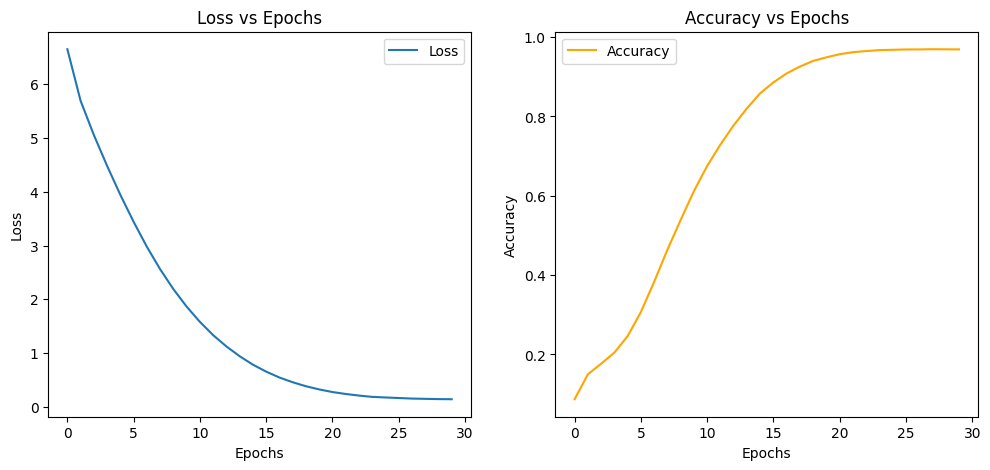

In [ ]:

import matplotlib.pyplot as plt

train_losses = []
train_accuracies = []

# training loop
for epoch in range(epochs):
    total_loss = 0
    correct = 0
    total = 0

    for batch_x, batch_y in dataloader:

        batch_x, batch_y = batch_x.to(device), batch_y.to(device)  # Moved to GPU

        optimizer.zero_grad()  # Zero the gradients

        output = model(batch_x)  # Forward propagation
        loss = criterion(output, batch_y)  # Compute loss

        loss.backward()  # Backward propagation

        # Gradient Clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()  # Update gradients

        total_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(output.data, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

    epoch_loss = total_loss / len(dataloader)
    epoch_acc = correct / total

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    print(f"Epoch: {epoch + 1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

# Plotting
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Accuracy', color='orange')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
# prediction

def prediction(model, vocab, text):

  # tokenize
  tokenized_text = word_tokenize(text.lower())

  # text -> numerical indices
  numerical_text = text_to_indices(tokenized_text, vocab)

  # padding
  padded_text = torch.tensor([0] * (longest_sentence - len(numerical_text)) + numerical_text, dtype=torch.long).unsqueeze(0)

  # Move input to same device as the model
  device = next(model.parameters()).device  # Get model device
  padded_text = padded_text.to(device)  # Move input tensor to model's device

  # send to model
  output = model(padded_text)

  # predicted index
  value, index = torch.max(output, dim=1)

  # merge with text
  return text + " " + list(vocab.keys())[index]



In [ ]:
print(batch_y.min(), batch_y.max())


tensor(4, device='cuda:0') tensor(4423, device='cuda:0')


In [ ]:
prediction(model, vocab, "These probabilistic models are versatile,")

'These probabilistic models are versatile, but'

In [ ]:
import time

num_tokens = 50
input_text = "They sometimes need a large"

for i in range(num_tokens):
    output_text = prediction(model, vocab, input_text)
    print(output_text)
    input_text = output_text
    if (output_text.strip().endswith('.')):
        break
    time.sleep(0.5)


They sometimes need a large database
They sometimes need a large database of
They sometimes need a large database of mathematical
They sometimes need a large database of mathematical problems
They sometimes need a large database of mathematical problems to
They sometimes need a large database of mathematical problems to learn
They sometimes need a large database of mathematical problems to learn from
They sometimes need a large database of mathematical problems to learn from ,
They sometimes need a large database of mathematical problems to learn from , but
They sometimes need a large database of mathematical problems to learn from , but also
They sometimes need a large database of mathematical problems to learn from , but also methods
They sometimes need a large database of mathematical problems to learn from , but also methods such
They sometimes need a large database of mathematical problems to learn from , but also methods such as
They sometimes need a large database of mathematica

In [ ]:
dataloader1 = DataLoader(dataset, batch_size=32, shuffle=False)

In [ ]:
# Function to calculate accuracy
def calculate_accuracy(model, dataloader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # No need to compute gradients
        for batch_x, batch_y in dataloader1:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            # Get model predictions
            outputs = model(batch_x)

            # Get the predicted word indices
            _, predicted = torch.max(outputs, dim=1)

            # Compare with actual labels
            correct += (predicted == batch_y).sum().item()
            total += batch_y.size(0)

    accuracy = correct / total * 100
    return accuracy

# Compute accuracy
accuracy = calculate_accuracy(model, dataloader, device)
print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 97.39%
